
### <font color='black'> Welcome everyone! </font>

In this notebook, I tried to show you some samples of analysis, charts and datasets. You can try to check out other dates of Twitter stream, combine methods or use different analytical methods.

#### Please <font color='green'> UPVOTE </font> to keep this going.

#### <font color='blue'> #StayHomeAndCode </font>

# <font color='black'> Table of Contents </font>
1. <a href='#prep'>Preprations</a>
1. <a href='#twitter'>Covid-19 Twitter Dataset</a>
1. <a href='#word'>Covid-19 In the world</a>
1. <a href='#chi'>Covid-19 in China</a>
1. <a href='#us'>Covid-19 in US</a>
1. <a href='#ind'>Covid-19 in India</a>
1. <a href='#usw'>US X The rest of the word</a>



<a id='prep'></a>
#  <font color='black'> Preprations </font>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
from plotly.subplots import make_subplots
import seaborn as sns
import datetime

In [ ]:
data = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')


<font color='black'> Calculating the percentage of missing values of each feature </font>


In [ ]:
#Percentage of NAN Values 
NAN = [(c, data[c].isna().mean()*100) for c in data]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN


<font color='black'> 34 % of Province/State are unknown we will fill nan values with Unknown. </font>


In [ ]:
data["Province/State"]= data["Province/State"].fillna('Unknown')


Change Data Type for "Confirmed","Deaths" and "Recovered"  columns to int

In [ ]:
data.head()

In [ ]:
data[["Confirmed","Deaths","Recovered"]] =data[["Confirmed","Deaths","Recovered"]].astype(int)

Replacing "Mainland China" with "China" 

In [ ]:
data['Country/Region'] = data['Country/Region'].replace('Mainland China', 'China')

* Creating new feature "Active_case" 
* Active_case = Confirmed - Deaths - Recovered

In [ ]:
data['Active_case'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
data.head()

Get Last update

In [ ]:
Data = data[data['ObservationDate'] == max(data['ObservationDate'])].reset_index()



<a id='twitter'></a>
#  <font color='black'> **Covid-19 Twitter Dataset** </font>

In [ ]:
!ls ../input/covid19-complete-twitter-dataset-daily-updates/dailies/2020-03-22/

In [ ]:
bp = '../input/covid19-complete-twitter-dataset-daily-updates/dailies/'

def check_for_date(d):
    tw1 = pd.read_csv(bp + d + '/{}-dataset.tsv'.format(d))
    tw2 = pd.read_csv(bp + d + '/{}_clean-dataset.tsv'.format(d))
    tw3 = pd.read_csv(bp + d + '/{}_top1000bigrams.csv'.format(d))
    tw4 = pd.read_csv(bp + d + '/{}_top1000terms.csv'.format(d),  header=None)
    tw4.columns = ['term', 'count']
    tw5 = pd.read_csv(bp + d + '/{}_top1000trigrams.csv'.format(d))
    return tw1, tw2,tw3, tw4, tw5

### Tweets at 2020/03/22

In [ ]:
tw1, tw2,tw3, tw4, tw5 = check_for_date('2020-03-22')
print('top terms')
display(tw4.head(10))
print('top bi-grams')
display(tw3.head(7))
print('top tri-grams')
display(tw5.head(7))

# Tweets at 2020/08/22

5 Months later

In [ ]:
tw1, tw2,tw3, tw4, tw5 = check_for_date('2020-08-22')
print('top terms')
display(tw4.head(10))
print('top bi-grams')
display(tw3.head(7))
print('top tri-grams')
display(tw5.head(7))


<a id='word'></a>
#  <font color='black'> **Covid-19 In the world** </font>

In [ ]:
Data_world = Data.groupby(["ObservationDate"])[["Confirmed","Active_case","Recovered","Deaths"]].sum().reset_index()

In [ ]:
labels = ["Last Update","Confirmed","Active cases","Recovered","Deaths"]
fig = go.Figure(data=[go.Table(header=dict(values=labels),
                 cells=dict(values=Data_world.loc[0,["ObservationDate","Confirmed","Active_case","Recovered","Deaths"]]))
                     ])
fig.update_layout(
    title='Coronavirus in the word : ',
)
fig.show()


In [ ]:
labels = ["Active cases","Recovered","Deaths"]
values = Data_world.loc[0, ["Active_case","Recovered","Deaths"]]
fig = px.pie(Data_world, values=values, names=labels,color_discrete_sequence=['rgb(77,146,33)','rgb(69,144,185)','rgb(77,77,77)'],hole=0.7)
fig.update_layout(
    title='Total cases : '+str(Data_world["Confirmed"][0]),
)
fig.show()

Evolution of coronavirus over time

In [ ]:
data_over_time= data.groupby(["ObservationDate"])[["Confirmed","Active_case","Recovered","Deaths"]].sum().reset_index().sort_values("ObservationDate",ascending=True).reset_index(drop=True)



In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_over_time.index, y=data_over_time['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))


fig.update_layout(
    title='Evolution of Confirmed cases over time in the word',
        template='plotly_white',
      yaxis_title="Confirmed cases",
    xaxis_title="Days",

)

fig.show()

In [ ]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=data_over_time.index, y=data_over_time['Active_case'],
                    mode='lines',marker_color='yellow',
                    name='Active cases',line=dict( dash='dot')))

fig.update_layout(
    title='Evolution of Active cases over time in the world',
        template='plotly_dark',
      yaxis_title="Active cases",
    xaxis_title="Days",

)

fig.show()



In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_over_time.index, y=data_over_time['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))

fig.update_layout(
    title='Evolution of Recovered cases over time in the world',
        template='plotly_white',
      yaxis_title="Recovered cases",
    xaxis_title="Days",

)

fig.show()



In [ ]:

fig = go.Figure()

fig.add_trace(go.Scatter(x=data_over_time.index, y=data_over_time['Deaths'],name='Deaths',
                                   marker_color='black',mode='lines',line=dict( dash='dot') ))

fig.update_layout(
    title='Evolution of Deaths over time in the world',
        template='plotly_white',
     yaxis_title="Deaths",
    xaxis_title="Days",

)

fig.show()

In [ ]:

fig = go.Figure(go.Bar(
            x=data_over_time['ObservationDate'],
            y=data_over_time['Confirmed'],
           ))
fig.update_layout(
    title='Confirmed Cases In Each Day',
    template='plotly_white',
     xaxis_title="Confirmed Cases",
    yaxis_title="Days",
)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=data_over_time['ObservationDate'],
            y=data_over_time['Active_case'],
    marker_color='rgb(253,187,132)'
           ))
fig.update_layout(
    title='Active Cases In Each Day',
    template='plotly_dark',
     xaxis_title="Active Cases",
    yaxis_title="Days",
)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=data_over_time['ObservationDate'],
            y=data_over_time['Recovered'],
    marker_color='rgb(178,24,43)'
           ))
fig.update_layout(
    title='Recovered Cases In Each Day',
    template='plotly_white',
     xaxis_title="Recovered Cases",
    yaxis_title="Days",
)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=data_over_time['ObservationDate'],
            y=data_over_time['Deaths'],
    marker_color='rgb(13,48,100)'
           ))
fig.update_layout(
    title='Deaths In Each Day',
    template='plotly_white',
     xaxis_title="Deaths",
    yaxis_title="Days",
)
fig.show()

 **Confirmed cases in each Country**

In [ ]:
Data_per_country = Data.groupby(["Country/Region"])["Confirmed","Active_case","Recovered","Deaths"].sum().reset_index().sort_values("Confirmed",ascending=False).reset_index(drop=True)


In [ ]:
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Country</b>','<b>Confirmed Cases</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
      
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      Data_per_country['Country/Region'],
      Data_per_country['Confirmed'],
      ],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*len(Data_per_country)],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])
fig.update_layout(
    title='Confirmed Cases In Each Country',
)
fig.show()

In [ ]:

fig = go.Figure(go.Bar(
            x=Data_per_country['Confirmed'],
            y=Data_per_country['Country/Region'],
            orientation='h'))
fig.update_layout(
    title='Confirmed Cases In Each Country',
    template='plotly_white',
     xaxis_title="Confirmed Cases",
    yaxis_title="Countries",
)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=Data_per_country['Active_case'],
            y=Data_per_country['Country/Region'],
            orientation='h',
            marker_color='#DC3912',))
fig.update_layout(
    title='Active Cases In Each Country',
    template='plotly_white',
    xaxis_title="Active Cases",
    yaxis_title="Countries",
)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=Data_per_country['Recovered'],
            y=Data_per_country['Country/Region'],
            orientation='h',
            marker_color='#2CA02C',))
fig.update_layout(
    title='Recovered Cases In Each Country',
    template='plotly_white',
     xaxis_title="Recovered Cases",
    yaxis_title="Countries",
)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=Data_per_country['Deaths'],
            y=Data_per_country['Country/Region'],
            orientation='h',
            marker_color='black',))
fig.update_layout(
    title='Deaths In Each Country',
    template='plotly_white',
    xaxis_title="Deaths",
    yaxis_title="Countries",
)

fig.show()

In [ ]:
fig = px.choropleth(Data_per_country, locations=Data_per_country['Country/Region'],
                    color=Data_per_country['Confirmed'],locationmode='country names', 
                    hover_name=Data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,template='plotly_dark', )
fig.update_layout(
    title='Confirmed Cases In Each Country',
)
fig.show()

In [ ]:
fig = px.choropleth(Data_per_country, locations=Data_per_country['Country/Region'],
                    color=Data_per_country['Active_case'],locationmode='country names', 
                    hover_name=Data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,template='plotly_white', )
fig.update_layout(
    title='Active Cases In Each Country',
)
fig.show()

In [ ]:
fig = px.choropleth(Data_per_country, locations=Data_per_country['Country/Region'],
                    color=Data_per_country['Recovered'],locationmode='country names', 
                    hover_name=Data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,template='plotly_white', )
fig.update_layout(
    title='Recovered Cases In Each Country',
)
fig.show()

In [ ]:
fig = px.choropleth(Data_per_country, locations=Data_per_country['Country/Region'],
                    color=Data_per_country['Deaths'],locationmode='country names', 
                    hover_name=Data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,template='plotly_dark', )
fig.update_layout(
    title='Deaths In Each Country',
)
fig.show()

Evolution of coronavirus over time.

In [ ]:
data_per_country = data.groupby(["Country/Region","ObservationDate"])[["Confirmed","Active_case","Recovered","Deaths"]].sum().reset_index().sort_values("ObservationDate",ascending=True).reset_index(drop=True)


In [ ]:
fig = px.choropleth(data_per_country, locations=data_per_country['Country/Region'],
                    color=data_per_country['Confirmed'],locationmode='country names', 
                    hover_name=data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.deep,
                    animation_frame="ObservationDate")
fig.update_layout(

    title='Evolution of confirmed cases In Each Country',
)
fig.show()

In [ ]:
fig = px.choropleth(data_per_country, locations=data_per_country['Country/Region'],
                    color=data_per_country['Active_case'],locationmode='country names', 
                    hover_name=data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,
                    animation_frame="ObservationDate")
fig.update_layout(

    title='Evolution of active cases In Each Country',
    template='plotly_dark'
)
fig.show()

In [ ]:
fig = px.choropleth(data_per_country, locations=data_per_country['Country/Region'],
                    color=data_per_country['Recovered'],locationmode='country names', 
                    hover_name=data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.deep,
                    animation_frame="ObservationDate")
fig.update_layout(
    title='Evolution of recovered cases In Each Country',
)
fig.show()

In [ ]:
fig = px.choropleth(data_per_country, locations=data_per_country['Country/Region'],
                    color=data_per_country['Deaths'],locationmode='country names', 
                    hover_name=data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,
                    animation_frame="ObservationDate")
fig.update_layout(
    title='Evolution of deaths In Each Country',
    template='plotly_dark'
)
fig.show()

In [ ]:
fig = go.Figure(data=[go.Bar(
            x=Data_per_country['Country/Region'][0:10], y=Data_per_country['Confirmed'][0:10],
            text=Data_per_country['Confirmed'][0:10],
            textposition='auto',
            marker_color='black',
            

        )])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
        template='plotly_white'

)
fig.show()

In [ ]:
fig = go.Figure(data=[go.Scatter(
    x=Data_per_country['Country/Region'][0:10],
    y=Data_per_country['Confirmed'][0:10],
    mode='markers',
    
    marker=dict(
        color=100+np.random.randn(500),
        size=(Data_per_country['Confirmed'][0:10]/25000),
        showscale=True
        )
)])

fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    template='plotly_dark'
)
fig.show()

* **Lets start with good news :  **
**Recorvered cases in each Country **

In [ ]:
Recovered_per_country = Data.groupby(["Country/Region"])["Recovered"].sum().reset_index().sort_values("Recovered",ascending=False).reset_index(drop=True)


In [ ]:
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Country</b>','<b>Recovered Cases</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      Recovered_per_country['Country/Region'],
      Recovered_per_country['Recovered'],
      ],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*len(Data_per_country)],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])
fig.update_layout(
    title='Recovered Cases In Each Country',
)
fig.show()

In [ ]:
fig = px.pie(Recovered_per_country, values=Recovered_per_country['Recovered'], names=Recovered_per_country['Country/Region'],
             title='Recovered cases',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    template='plotly_white'
)
fig.show()

In [ ]:
fig = go.Figure(data=[go.Bar(
            x=Recovered_per_country['Country/Region'][0:10], y=Recovered_per_country['Recovered'][0:10],
            text=Recovered_per_country['Recovered'][0:10],
            textposition='auto',
            marker_color='green',

        )])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Recovered Cases",
    template='plotly_white'
)
fig.show()


In [ ]:
fig = go.Figure(data=[go.Scatter(
    x=Recovered_per_country['Country/Region'][0:10],
    y=Recovered_per_country['Recovered'][0:10],
    mode='markers',
    marker=dict(
        color=100+np.random.randn(500),
        size=(Data_per_country['Recovered'][0:10]/20000),
        showscale=True
        )
)])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Recovered Cases",
    template='plotly_white'

)
fig.show()

**Active cases in each Country **

In [ ]:
Active_per_country = Data.groupby(["Country/Region"])["Active_case"].sum().reset_index().sort_values("Active_case",ascending=False).reset_index(drop=True)


In [ ]:
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Country</b>','<b>Active Cases</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      Active_per_country['Country/Region'],
      Active_per_country['Active_case'],
      ],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*len(Data_per_country)],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])
fig.update_layout(
    title='Active Cases In Each Country',
)
fig.show()

In [ ]:
fig = go.Figure(data=[go.Bar(
            x=Active_per_country['Country/Region'][0:10], y=Active_per_country['Active_case'][0:10],
            text=Active_per_country['Active_case'][0:10],
           
        )])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Active Cases",
    template='plotly_white'
)
fig.show()


In [ ]:
fig = go.Figure(data=[go.Scatter(
    x=Active_per_country['Country/Region'][0:10],
    y=Active_per_country['Active_case'][0:10],
    mode='markers',
    marker=dict(
        color=10+np.random.randn(200),

        size=Active_per_country['Active_case'][0:10]/15000,
        showscale=True
        )
)])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Active Cases",
        template='plotly_white'

)
fig.show()

**Deaths cases in each Country **

In [ ]:
Deaths_per_country = Data.groupby(["Country/Region"])["Deaths"].sum().reset_index().sort_values("Deaths",ascending=False).reset_index(drop=True)


In [ ]:
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Country</b>','<b>Deaths</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      Deaths_per_country['Country/Region'],
      Deaths_per_country['Deaths'],
      ],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*len(Data_per_country)],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])
fig.update_layout(
    title='Deaths In Each Country',
)
fig.show()

In [ ]:
fig = go.Figure(data=[go.Bar(
            x=Deaths_per_country['Country/Region'][0:10], y=Deaths_per_country['Deaths'][0:10],
            text=Deaths_per_country['Deaths'][0:10],
            textposition='auto',
            marker_color='black'

        )])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Deaths",
        template='plotly_white'

)
fig.show()



In [ ]:
fig = go.Figure(data=[go.Scatter(
    x=Deaths_per_country['Country/Region'][0:10],
    y=Deaths_per_country['Deaths'][0:10],
    mode='markers',
    marker=dict(
        color=[145, 140, 135, 130, 125, 120,115,110,105,100],
        size=Deaths_per_country['Deaths'][0:10]/1000,
        showscale=True
        )
)])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Deaths",
        template='plotly_white'

)
fig.show()

<a id='chi'></a>
#  <font color='black'> **Coronavirus in China** </font>
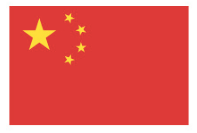

In [ ]:
Data_China = data [(data['Country/Region'] == 'China') ].reset_index(drop=True)
Data_China.head()

Get last update in china

In [ ]:
Data_china_last = Data_China[Data_China['ObservationDate'] == max(Data_China['ObservationDate'])].reset_index()
Data_china_last.head()

Confirmed cases in every Province/State in china

In [ ]:
Data_china_per_state= Data_china_last.groupby(["Province/State"])["Confirmed","Active_case","Recovered","Deaths"].sum().reset_index().sort_values("Confirmed",ascending=False).reset_index(drop=True)


In [ ]:
fig = px.pie(Data_china_per_state, values=Data_china_per_state['Confirmed'], names=Data_china_per_state['Province/State'],
             title='Confirmed cases in China',
            hole=.2)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=Data_china_per_state['Active_case'],
            y=Data_china_per_state['Province/State'],
            orientation='h',
            marker_color='#DC3912',))
fig.update_layout(
    title='Active Cases In Each Province/State',
    template='plotly_white',
    xaxis_title="Active Cases",
    yaxis_title="Province/State",
)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=Data_china_per_state['Recovered'],
            y=Data_china_per_state['Province/State'],
            orientation='h',
            marker_color='green',))
fig.update_layout(
    title='Active Cases In Each Province/State',
    template='plotly_white',
    xaxis_title="Recovered Cases",
    yaxis_title="Province/State",
)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=Data_china_per_state['Deaths'],
            y=Data_china_per_state['Province/State'],
            orientation='h',
            marker_color='black',))
fig.update_layout(
    title='Deaths In Each Province/State',
    template='plotly_white',
    xaxis_title="Deaths",
    yaxis_title="Province/State",
)
fig.show()

Get total cases in China

In [ ]:
Data_china_total= Data_china_last.groupby(["Country/Region"])["Confirmed","Deaths","Recovered","Active_case"].sum().reset_index().reset_index(drop=True)


In [ ]:
labels = ["Active cases","Recovered","Deaths"]
values = Data_china_total.loc[0, ["Active_case","Recovered","Deaths"]]
df = px.data.tips()
fig = px.pie(Data_china_total, values=values, names=labels, color_discrete_sequence=['green','royalblue','darkblue'], hole=0.5)
fig.update_layout(
    title='Total cases in China : '+str(Data_china_total["Confirmed"][0]),
)
fig.show()

Evolution of cases over time in China

In [ ]:
Data_china_op= Data_China.groupby(["ObservationDate","Country/Region"])["Confirmed","Deaths","Recovered","Active_case"].sum().reset_index().reset_index(drop=True)


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_china_op['ObservationDate'], y=Data_china_op['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))


fig.add_trace(go.Scatter(x=Data_china_op['ObservationDate'], y=Data_china_op['Active_case'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_china_op['ObservationDate'], y=Data_china_op['Deaths'],name='Deaths',
                                   marker_color='black',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_china_op['ObservationDate'], y=Data_china_op['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))

fig.update_layout(
    title='Evolution of cases over time in China',
        template='plotly_white'

)

fig.show()


<a id='us'></a>
#  <font color='black'> **Coronavirus in the United States of America** </font>
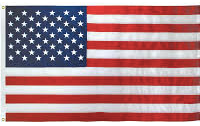

In [ ]:
Data_US = data [(data['Country/Region'] == 'US') ].reset_index(drop=True)


Get last update in US



In [ ]:
Data_us_last = Data_US[Data_US['ObservationDate'] == max(Data_US['ObservationDate'])].reset_index()

In [ ]:
Data_us_total= Data_us_last.groupby(["Country/Region"])["Confirmed","Deaths","Recovered","Active_case"].sum().reset_index().reset_index(drop=True)


In [ ]:
labels = ["Active cases","Recovered","Deaths"]
values = Data_us_total.loc[0, ["Active_case","Recovered","Deaths"]]
df = px.data.tips()
fig = px.pie(Data_us_total, values=values, names=labels, color_discrete_sequence=['royalblue','darkblue','green'], hole=0.5)
fig.update_layout(
    title='Total cases in United States : '+str(Data_us_total["Confirmed"][0]),
)
fig.show()

Cases in every Province/State in US



In [ ]:
Data_us_per_state= Data_us_last.groupby(["Province/State"])["Confirmed","Active_case","Deaths"].sum().reset_index().sort_values("Confirmed",ascending=False).reset_index(drop=True)


In [ ]:
fig = px.pie(Data_us_per_state, values=Data_us_per_state['Confirmed'], names=Data_us_per_state['Province/State'],
             title='Confirmed cases in United States',
            hole=.2)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
fig = px.pie(Data_us_per_state, values=Data_us_per_state['Active_case'], names=Data_us_per_state['Province/State'],
             title='Active cases in United States',
            hole=.2)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
fig = px.pie(Data_us_per_state, values=Data_us_per_state['Deaths'], names=Data_us_per_state['Province/State'],
             title='Deaths in United States',
            hole=.2)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
Data_US_op= Data_US.groupby(["ObservationDate","Country/Region"])["Confirmed","Deaths","Recovered","Active_case"].sum().reset_index().reset_index(drop=True)


In [ ]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_US_op.index, y=Data_US_op['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))


fig.update_layout(
    title='Evolution of Confirmed cases over time in US',
        template='plotly_white'

)

fig.show()


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=Data_US_op.index, y=Data_US_op['Active_case'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))

fig.update_layout(
    title='Evolution of Acitive cases over time in US',
        template='plotly_white'

)

fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=Data_US_op.index, y=Data_US_op['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))

fig.update_layout(
    title='Evolution of Recovered cases over time in US',
        template='plotly_white'

)

fig.show()


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=Data_US_op.index, y=Data_US_op['Deaths'],name='Deaths',
                                   marker_color='white',mode='lines',line=dict( dash='dot') ))

fig.update_layout(
    title='Evolution of Deaths over time in US',
        template='plotly_dark'

)

fig.show()

<a id='ind'></a>
#  <font color='black'> **Coronavirus in India** </font>

![ind](https://upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/1200px-Flag_of_India.svg.png)

In [ ]:
Data_Spain = data [(data['Country/Region'] == 'India') ].reset_index(drop=True)


Get last update in India



In [ ]:
Data_spain = Data_Spain[Data_Spain['ObservationDate'] == max(Data_Spain['ObservationDate'])].reset_index()
Data_spain_last= Data_spain.groupby(["Country/Region"])["Confirmed","Deaths","Recovered","Active_case"].sum().reset_index().reset_index(drop=True)


In [ ]:
labels = ["Active cases","Recovered","Deaths"]
values = Data_spain_last.loc[0, ["Active_case","Recovered","Deaths"]]
df = px.data.tips()
fig = px.pie(Data_spain_last, values=values, names=labels, color_discrete_sequence=['royalblue','green','darkblue'], hole=0.5)
fig.update_layout(
    title='Total cases in India: '+str(Data_spain_last["Confirmed"][0]),
)
fig.show()

In [ ]:
Data_spain_per_state= Data_spain.groupby(["Province/State"])["Confirmed","Deaths","Recovered","Active_case"].sum().reset_index().sort_values("Confirmed",ascending=False).reset_index(drop=True)


In [ ]:

fig = px.treemap(Data_spain_per_state, path=['Province/State'], values=Data_spain_per_state['Confirmed'], height=700,
                 title='Confirmed cases in India', color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()



In [ ]:

fig = px.treemap(Data_spain_per_state, path=['Province/State'], values=Data_spain_per_state['Recovered'], height=700,
                 title='Recovered cases in India', color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()



In [ ]:

fig = px.treemap(Data_spain_per_state, path=['Province/State'], values=Data_spain_per_state['Active_case'], height=700,
                 title='Active cases in India', color_discrete_sequence = px.colors.sequential.deep)
fig.data[0].textinfo = 'label+text+value'
fig.show()



In [ ]:


fig = px.treemap(Data_spain_per_state, path=['Province/State'], values=Data_spain_per_state['Deaths'], height=700,
                 title='Deaths in India', color_discrete_sequence = px.colors.sequential.deep)
fig.data[0].textinfo = 'label+text+value'
fig.show()



In [ ]:
Data_spain_op= Data_Spain.groupby(["ObservationDate","Country/Region"])["Confirmed","Deaths","Recovered","Active_case"].sum().reset_index().reset_index(drop=True)


In [ ]:
fig = go.Figure(go.Bar(
            x=Data_spain_op['ObservationDate'],
            y=Data_spain_op['Confirmed'],
           ))
fig.update_layout(
    title='Confirmed Cases In Each Day',
    template='plotly_white',
     xaxis_title="Confirmed Cases",
    yaxis_title="Days",
)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=Data_spain_op['ObservationDate'],
            y=Data_spain_op['Active_case'],
    marker_color='rgb(253,187,132)'
           ))
fig.update_layout(
    title='Active Cases In Each Day',
    template='plotly_dark',
     xaxis_title="Active Cases",
    yaxis_title="Days",
)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=Data_spain_op['ObservationDate'],
            y=Data_spain_op['Recovered'],
    marker_color='rgb(178,24,43)'
           ))
fig.update_layout(
    title='Recovered Cases In Each Day',
    template='plotly_white',
     xaxis_title="Recovered Cases",
    yaxis_title="Days",
)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=Data_spain_op['ObservationDate'],
            y=Data_spain_op['Deaths'],
    marker_color='rgb(13,48,100)'
           ))
fig.update_layout(
    title='Deaths In Each Day India',
    template='plotly_white',
     xaxis_title="Deaths",
    yaxis_title="Days",
)
fig.show()

<a id='usw'></a>

#  <font color='black'> **US X The rest of the word** </font>


In [ ]:

Data_Word = data [(data['Country/Region'] != 'US') ].reset_index(drop=True)
Data_WORD_last = Data_Word[Data_Word['ObservationDate'] == max(Data_Word['ObservationDate'])].reset_index()
Data_us_total= Data_us_last.groupby(["Country/Region"])["Confirmed","Deaths","Recovered","Active_case"].sum().reset_index().reset_index(drop=True)
Data_word_total= Data_WORD_last.groupby(["ObservationDate"])["Confirmed","Deaths","Recovered","Active_case"].sum().reset_index().reset_index(drop=True)

Data_Word_op= Data_Word.groupby(["ObservationDate"])["Confirmed","Deaths","Recovered","Active_case"].sum().reset_index().reset_index(drop=True)


In [ ]:
labels = ["US","The rest of the world"]
values = [Data_us_total.loc[0, ["Confirmed"]], Data_word_total.loc[0, ["Confirmed"]]]
df = px.data.tips()
fig = px.pie(data, values=values, names=labels, color_discrete_sequence=['rgb(251,121,114)','rgb(128,177,211)'])
fig.update_layout(
    title='Confirmed cases in US and The Rest Of The World : ',
)
fig.show()

In [ ]:
labels = ["US","The rest of the world"]
values = [Data_us_total.loc[0, ["Active_case"]], Data_word_total.loc[0, ["Active_case"]]]
df = px.data.tips()
fig = px.pie(data, values=values, names=labels, color_discrete_sequence=['rgb(204,235,197)','rgb(222,203,228)'],hole=0.6)
fig.update_layout(
    title='Active cases in US and The Rest Of The World : ',
)
fig.show()

In [ ]:
labels = ["US","The rest of the world"]
values = [Data_us_total.loc[0, ["Recovered"]], Data_word_total.loc[0, ["Recovered"]]]
df = px.data.tips()
fig = px.pie(data, values=values, names=labels, color_discrete_sequence=['rgb(253,205,172)','rgb(179,226,205)'],hole=0.4)
fig.update_layout(
    title='Recovered cases in US and The Rest Of The World : ',
)
fig.show()

In [ ]:
labels = ["US","The rest of the world"]
values = [Data_us_total.loc[0, ["Deaths"]], Data_word_total.loc[0, ["Deaths"]]]
df = px.data.tips()
fig = px.pie(data, values=values, names=labels, color_discrete_sequence=['rgb(229,196,148)','rgb(179,226,205)'])
fig.update_layout(
    title='Deaths in US and The Rest Of The World : ',
)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_US_op.index, y=Data_US_op['Confirmed'],
                    mode='lines',
                    name='Confirmed cases in US'))


fig.add_trace(go.Scatter(x=Data_Word_op.index, y=Data_Word_op['Confirmed'],
                    mode='lines',
                    name='Confirmed cases in The Rest Of The Word'))

fig.update_layout(
    title='Evolution of Confirmed cases over time in US and The Rest Of The Word',
        template='plotly_white'

)

fig.show()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_US_op.index, y=Data_US_op['Active_case'],
                    mode='lines',
                    name='Active cases in US'))


fig.add_trace(go.Scatter(x=Data_Word_op.index, y=Data_Word_op['Active_case'],
                    mode='lines',
                    name='Active cases in The Rest Of The Word'))

fig.update_layout(
    title='Evolution of Active cases over time in US and The Rest Of The Word',
        template='plotly_dark'

)

fig.show()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_US_op.index, y=Data_US_op['Recovered'],
                    mode='lines',
                    name='Recovered cases in US'))


fig.add_trace(go.Scatter(x=Data_Word_op.index, y=Data_Word_op['Recovered'],
                    mode='lines',
                    name='Recovered cases in The Rest Of The Word'))

fig.update_layout(
    title='Evolution of Recovered cases over time in US and The Rest Of The Word',
        template='plotly_dark'

)

fig.show()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_US_op.index, y=Data_US_op['Deaths'],
                    mode='lines',
                    name='Deaths in US'))


fig.add_trace(go.Scatter(x=Data_Word_op.index, y=Data_Word_op['Deaths'],
                    mode='lines',
                    name='Deathsin The Rest Of The Word'))
fig.update_layout(
    title='Evolution of Deaths over time in US and The Rest Of The Word',
        template='plotly_white'

)

fig.show()


# **Please UPVOTE to keep this going**
